# Analysing Escalability

## Import data

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Scale timings to microsecs
MICROSECS = True

# File with the data
file = 'trap_times.csv'

In [9]:
# Mounting data frame
cols = ['cores', 'problem_size', 'timing']
data = pd.read_csv(file, names=cols)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cores         360 non-null    int64  
 1   problem_size  360 non-null    int64  
 2   timing        360 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 8.6 KB


### Calculate median

In [10]:
cores = data['cores'].unique()
problem_sizes = data['problem_size'].unique()
rows= []

for c in cores:
    for ps in problem_sizes:
        temp = data[(data['cores'] == c) & (data['problem_size'] == ps)]
        median = temp['timing'].median()
        rows.append([c, ps, median])

df = pd.DataFrame(rows, columns=cols)
df.info()

df.to_csv('times.csv', index=False, header=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cores         36 non-null     int64  
 1   problem_size  36 non-null     int64  
 2   timing        36 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 992.0 bytes


## Speedups and Efficiences

In [11]:
# Tempos seriais
serial_timings = df[df['cores'] == 1]

# Speedups and efficiences vector
speedups = []
efficiencies = []

for index, row in df.iterrows():
    # Get the serial time for this problem size
    t1 = serial_timings[serial_timings['problem_size'] == row['problem_size']]['timing'].values[0]

    # Get the parallel time
    tp = row['timing']

    # Get the number of cores
    p = row['cores']
    
    # Calc speedup and efficiency
    speedups.append(t1/tp)
    efficiencies.append(t1/(p*tp))

# Add to the dataframe
df['speedup'] = speedups
df['efficiency'] = efficiencies

## Heatmaps

In [12]:
"""
Plot heatmap by means of a DataFrame
"""
def plot_heatmap(df, x, y, z, axis, title):
    pivot = df.pivot(index=x,columns=y,values=z)
    sns.set()
    sns.heatmap(pivot, annot=True, fmt=".2f", cmap="YlGnBu", ax=axis)
    axis.set_title(title)
    axis.set_xlabel("Tamanho do problema")
    axis.set_ylabel("Processos")

# Scaling

In [13]:
# Scaling the time in microsseconds
df['timing'] = df['timing']*(10000.0 if MICROSECS else 1.0)

# Problem size in the order of millions
df['problem_size'] = df['problem_size']/1000000

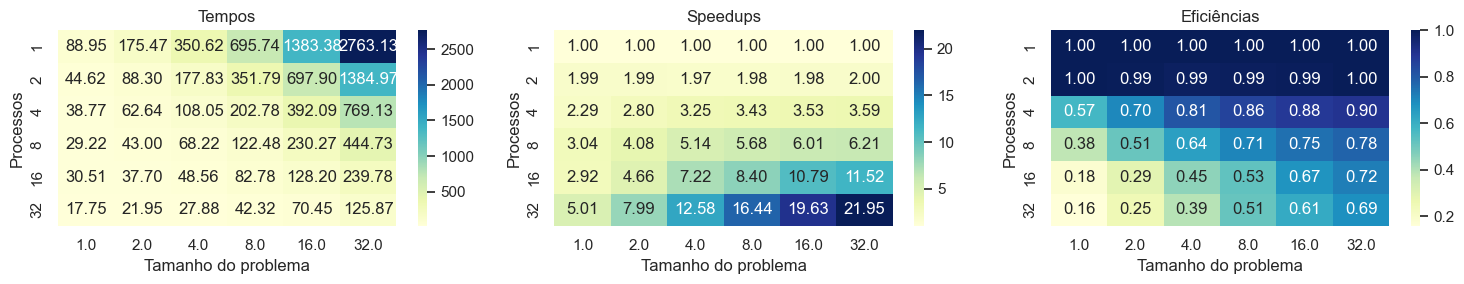

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(15, 3))
plot_heatmap(df, 'cores', 'problem_size', 'timing', axes[0], 'Tempos')
plot_heatmap(df, 'cores', 'problem_size', 'speedup', axes[1], 'Speedups')
plot_heatmap(df, 'cores', 'problem_size', 'efficiency', axes[2], 'Eficiências')
plt.tight_layout()
plt.show()